In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import string
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\My
[nltk_data]     Pc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
df=pd.read_csv(r'C:\Users\My Pc\ML_project\text\satya.csv',error_bad_lines=False, engine="python")

Skipping line 10603: unexpected end of data


In [3]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [4]:
#drop unnecessary columns


In [5]:
df=df.drop(['Title', 'Positive Feedback Count', 'Unnamed: 0'], axis=1)

In [6]:
df.dropna(inplace=True)

In [7]:
df['Polarity_Rating']=df['Rating'].apply(lambda x:'Positive' if x>3 else ('Neutral' if x==3 else 'Negative'))

In [8]:
df.head()

,Clothing ID,Age,Review Text,Rating,Recommended IND,Division Name,Department Name,Class Name,Polarity_Rating
0,767,33,Absolutely wonderful - silky and sexy and comf...,4,1,Initmates,Intimate,Intimates,Positive
1,1080,34,Love this dress! it's sooo pretty. i happene...,5,1,General,Dresses,Dresses,Positive
2,1077,60,I had such high hopes for this dress and reall...,3,0,General,Dresses,Dresses,Neutral
3,1049,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,General Petite,Bottoms,Pants,Positive
4,847,47,This shirt is very flattering to all due to th...,5,1,General,Tops,Blouses,Positive


In [9]:
#plot visualizing graph

<AxesSubplot:xlabel='Rating', ylabel='count'>

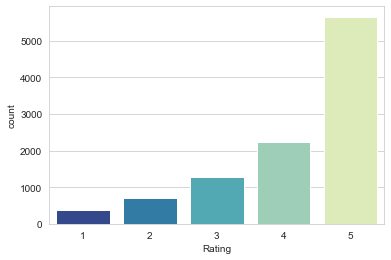

In [10]:
sns.set_style('whitegrid')
sns.countplot(x="Rating", data=df, palette="YlGnBu_r")

In [11]:
#plot the polarity rating count

<AxesSubplot:xlabel='Polarity_Rating', ylabel='count'>

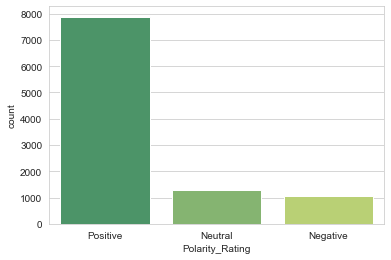

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='Polarity_Rating', data=df, palette='summer')

In [13]:
#Data processing

In [14]:
df_positive=df[df['Polarity_Rating']=='Positive'][0:8000]
df_Neutral=df[df['Polarity_Rating']=='Neutral']
df_Negative=df[df['Polarity_Rating']=='Negative']

In [15]:
#text preprocessing


In [16]:
def get_text_processing(text):
    stpword=stopwords.words('english')
    no_punctuation=[char for char in text if char not in string.punctuation]
    no_punctuation=''.join(no_punctuation)
    return ' '.join([word for word in no_punctuation.split() if word.lower() not in stpword])

In [17]:
df['review']=df['Review Text'].apply(get_text_processing)
df.head()

,Clothing ID,Age,Review Text,Rating,Recommended IND,Division Name,Department Name,Class Name,Polarity_Rating,review
0,767,33,Absolutely wonderful - silky and sexy and comf...,4,1,Initmates,Intimate,Intimates,Positive,Absolutely wonderful silky sexy comfortable
1,1080,34,Love this dress! it's sooo pretty. i happene...,5,1,General,Dresses,Dresses,Positive,Love dress sooo pretty happened find store im ...
2,1077,60,I had such high hopes for this dress and reall...,3,0,General,Dresses,Dresses,Neutral,high hopes dress really wanted work initially ...
3,1049,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,General Petite,Bottoms,Pants,Positive,love love love jumpsuit fun flirty fabulous ev...
4,847,47,This shirt is very flattering to all due to th...,5,1,General,Tops,Blouses,Positive,shirt flattering due adjustable front tie perf...


In [18]:
df=df[['review', 'Polarity_Rating']]

In [19]:
df.head()

,review,Polarity_Rating
0,Absolutely wonderful silky sexy comfortable,Positive
1,Love dress sooo pretty happened find store im ...,Positive
2,high hopes dress really wanted work initially ...,Neutral
3,love love love jumpsuit fun flirty fabulous ev...,Positive
4,shirt flattering due adjustable front tie perf...,Positive


In [20]:
#apply one hot encoding on Negative, positive, neutral

In [21]:
one_hot=pd.get_dummies(df['Polarity_Rating'])
df.drop(['Polarity_Rating'], axis=1, inplace=True)
df=pd.concat([df, one_hot], axis=1)
df.head()

,review,Negative,Neutral,Positive
0,Absolutely wonderful silky sexy comfortable,0,0,1
1,Love dress sooo pretty happened find store im ...,0,0,1
2,high hopes dress really wanted work initially ...,0,1,0
3,love love love jumpsuit fun flirty fabulous ev...,0,0,1
4,shirt flattering due adjustable front tie perf...,0,0,1
